In [1]:
%run lgs03a_data_unification.ipynb

In [1]:
%run lgs00_general_functions.ipynb

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

# Effect of mutations at each position

#### Color positional effects onto 3D structure

In [3]:
start_pymol()

In [4]:
def color_positions_by_effect(gene, median_effects, output_filepath, start_shift=0 ):
    cmd.reinitialize()
    open_or_fetch(pdb[gene])
    white_and_beautiful()

    color_positions(positions=list(range(start_shift, len(median_effects)+start_shift)), values=median_effects,
                        representation='cartoon', colormap=matplotlib.cm.Blues_r )
    save_session(filename_pse=output_filepath)

In [14]:
# cmd.reinitialize()
# open_or_fetch(pdb['amac'])
# white_and_beautiful()
# cmd.set('ray_trace_mode', 1)
# color_positions(list(range(240)), constant_color=colors['amac'], representation='cartoon',)
# save_session('cgreGFP_rain.pse')

 Applying pse_export_version=1.720 compatibility


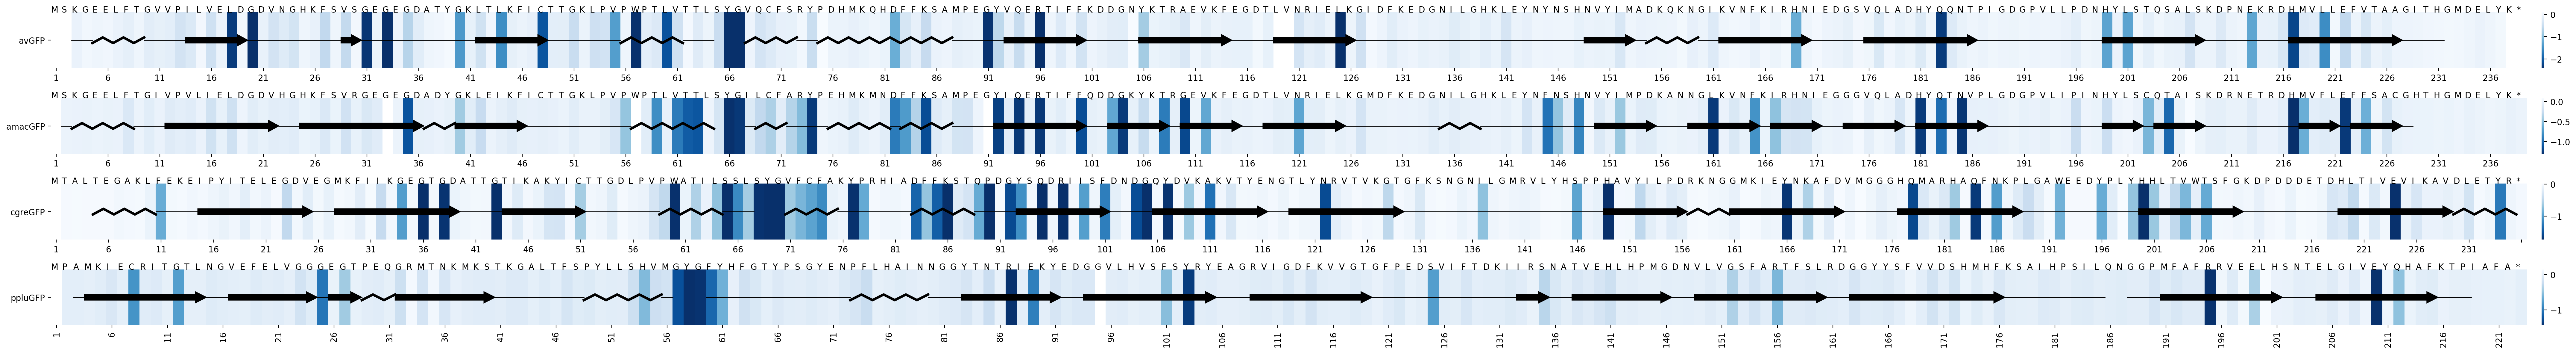

In [7]:
axes = subplots(height=1.5, width=50, nplots=4, nplots_per_row=1, dpi=300)
for ax,gene in zip(axes, ['av', 'amac', 'cgre', 'pplu']):
    effects_by_pos = get_effects_by_position(gene, df_effects_singles, positions='native')
    plt.sca(ax)
    sns.heatmap(np.array([effects_by_pos]), cmap='Blues_r', cbar_kws={'pad':0.005})
    plt.yticks([0.5], [gene+'GFP'], rotation=0)
    pos = [x+0.5 for x in range(len(effects_by_pos))]
    plt.xticks(pos[::5], range(1,len(effects_by_pos),5))
    for index,aa in enumerate(eval(gene+'_wt')[:]):
        plt.text(x=index, y=0, s=aa)
    plot_secondary_structure(eval(gene+'_ss_pymol'), y=0.5, hel=0.05, arrow_width=0.1, linewidth=1, c='k')
    
#     if gene != 'av':
#         color_positions_by_effect(gene, effects_by_pos[1:], 'positional_effects_%sGFP.pse' % gene, 
#                           start_shift=2)
#     else:
#         color_positions_by_effect(gene, effects_by_pos[2:], 'positional_effects_%sGFP.pse' % gene, 
#                           start_shift=3)

plt.tight_layout()

### Effects of specific amino acids by position

In [8]:
def get_aa_effect_by_pos(gene, dataset):
    array = []
    for aa in 'STNQDERKHFYWAVILMCGP':
        array.append(get_effects_by_position(gene=gene, dataset=dataset, aa=aa))
#     array = np.array(array)
    return array

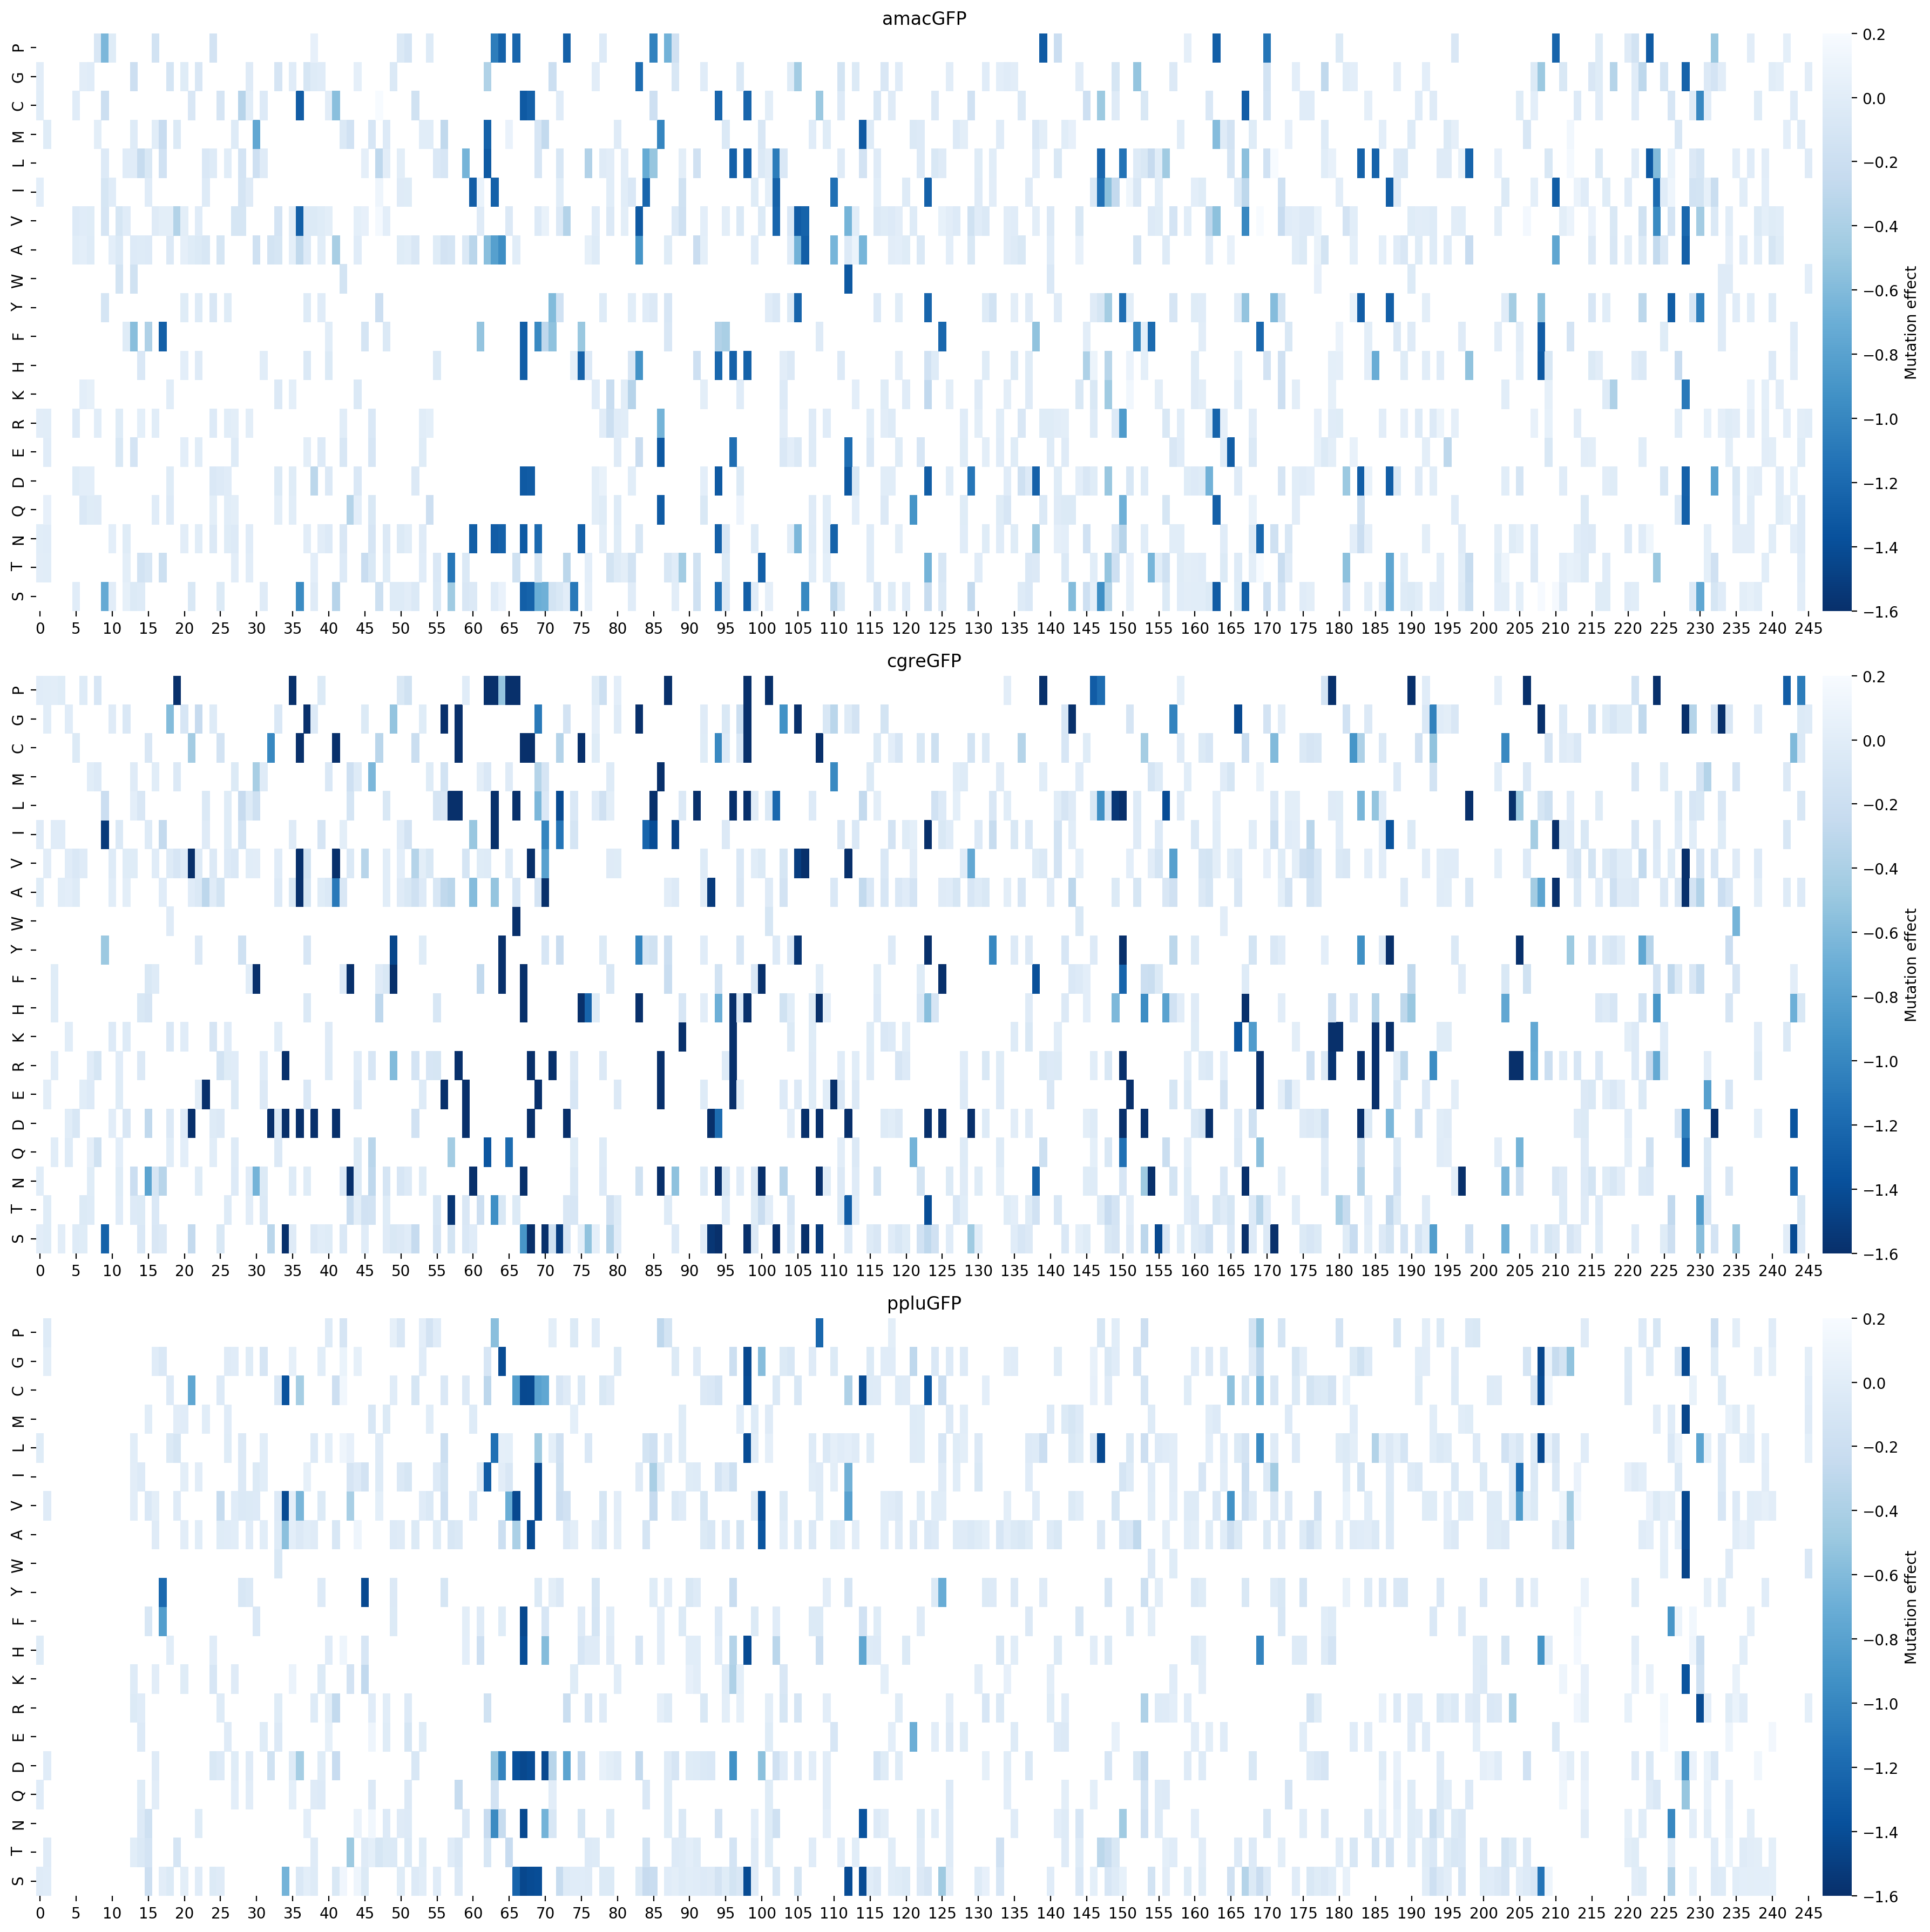

In [9]:
axes = subplots(nplots=3, nplots_per_row=1, height=6, width=20)
for ax,gene in zip(axes, ['amac', 'cgre', 'pplu']):
    plt.sca(ax)
    a = get_aa_effect_by_pos(gene, df_effects_singles)
    sns.heatmap(np.array(a), cmap='Blues_r', xticklabels=5, yticklabels=list('STNQDERKHFYWAVILMCGP'),
               vmax=0.2, vmin=-1.6, cbar_kws={'label':'Mutation effect', 'pad':0.005})
    plt.ylim(0,20)
    plt.title(gene+'GFP')
plt.tight_layout()